In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

import pandas_profiling

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

### 1. Problem Statement

The goal is to predict the __Man of the match__ award using this statistics before the official announcement that will be made right after the match.

In [2]:
fifa_data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/FIFA%202018%20Statistics.csv')
fifa_data.columns = ['date', 'team', 'opponent', 'goal_scored', 'ball_possession_perc', 'attempts', 'on_target', 'off_target', 'blocked', 'corners', 'offsides', 'free_kicks', 'saves', 'pass_accuracy', 'passes', 'distance_covered', 'fouls_committed', 'yellow_card', 'yellow_red_card', 'red_card', 'man_of_the_match', 'first_goal', 'round', 'pso', 'goals_in_pso', 'own_goals', 'own_goal_time']

In [3]:
fifa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 27 columns):
date                    128 non-null object
team                    128 non-null object
opponent                128 non-null object
goal_scored             128 non-null int64
ball_possession_perc    128 non-null int64
attempts                128 non-null int64
on_target               128 non-null int64
off_target              128 non-null int64
blocked                 128 non-null int64
corners                 128 non-null int64
offsides                128 non-null int64
free_kicks              128 non-null int64
saves                   128 non-null int64
pass_accuracy           128 non-null int64
passes                  128 non-null int64
distance_covered        128 non-null int64
fouls_committed         128 non-null int64
yellow_card             128 non-null int64
yellow_red_card         128 non-null int64
red_card                128 non-null int64
man_of_the_match        128 non-

In [4]:
fifa_data.describe()

,goal_scored,ball_possession_perc,attempts,on_target,off_target,blocked,corners,offsides,free_kicks,saves,pass_accuracy,passes,distance_covered,fouls_committed,yellow_card,yellow_red_card,red_card,first_goal,goals_in_pso,own_goals,own_goal_time
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,94.000000,128.000000,12.0,12.000000
mean,1.320312,49.992188,12.593750,3.914062,5.273438,3.359375,4.718750,1.343750,14.890625,2.726562,82.554688,462.648438,106.664062,13.546875,1.695312,0.015625,0.015625,39.457447,0.203125,1.0,45.833333
std,1.156519,10.444074,5.245827,2.234403,2.409675,2.403195,2.446072,1.193404,4.724262,2.049447,5.933766,151.186311,11.749537,4.619131,1.325454,0.124507,0.124507,24.496506,0.807049,0.0,29.978275
min,0.000000,25.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,67.000000,189.000000,80.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,12.000000
25%,0.000000,42.000000,9.000000,2.000000,4.000000,1.750000,3.000000,0.000000,11.000000,1.000000,79.000000,351.000000,101.000000,10.000000,1.000000,0.000000,0.000000,18.250000,0.000000,1.0,21.750000
50%,1.000000,50.000000,12.000000,3.500000,5.000000,3.000000,5.000000,1.000000,15.000000,2.000000,83.000000,462.000000,104.500000,13.000000,2.000000,0.000000,0.000000,39.000000,0.000000,1.0,35.000000
75%,2.000000,58.000000,15.000000,5.000000,7.000000,4.000000,6.000000,2.000000,18.000000,4.000000,87.000000,555.250000,109.000000,16.000000,2.000000,0.000000,0.000000,54.750000,0.000000,1.0,75.750000
max,6.000000,75.000000,26.000000,12.000000,11.000000,10.000000,11.000000,5.000000,26.000000,9.000000,94.000000,1137.000000,148.000000,25.000000,6.000000,1.000000,1.000000,90.000000,4.000000,1.0,90.000000


### 2. Data Loading and Description

The data consists of every match statistics and the final man of the match award to team. The data consists of 128 observations and 27 columns

### 3. Analysing using Pandas Profiling and Preprocessing

In [5]:
fifa_profile = pandas_profiling.ProfileReport(fifa_data)
fifa_profile.to_file('fifa_pre_profiling.html')

We will create a new column __red_card_issued__ by clubbing two old columns _yellow_red_card + red_card_ as in sport both will have same meaning that a player has to leave the field.

In [6]:
fifa_data['red_card_issued'] = fifa_data['yellow_red_card'] + fifa_data['red_card']

In [7]:
fifa_data.head()

,date,team,opponent,goal_scored,ball_possession_perc,attempts,on_target,off_target,blocked,corners,offsides,free_kicks,saves,pass_accuracy,passes,distance_covered,fouls_committed,yellow_card,yellow_red_card,red_card,man_of_the_match,first_goal,round,pso,goals_in_pso,own_goals,own_goal_time,red_card_issued
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN,0
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN,0
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN,0
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN,0
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0,0


Feature Engineering to add new column __result__ with values as _Won_, _Lost_, _Draw_. This is with respect to the Team column. The result with value _won_ will logically be very heavily correlated to __man_of_the_match__

In [8]:
#import pdb

def calculateResultOfMatch(team, date, goals_in_pso, goal_scored):
    totalGoalsScoredTeam = goals_in_pso + goal_scored
    #print('Total goals scored = ', totalGoalsScoredTeam)    
    opponentRow_df = fifa_data[(fifa_data['opponent'] == team) & (fifa_data['date'] == date)]
    #print('opponentRow_df.shape = ', opponentRow_df.shape)
    totalGoalsScoredOpponent = int(opponentRow_df['goals_in_pso']) + int(opponentRow_df['goal_scored'])
    #print('totalGoalsScoredOpponent = ', totalGoalsScoredOpponent)
    
    if totalGoalsScoredTeam > totalGoalsScoredOpponent:
        return 'Won'
    elif totalGoalsScoredTeam < totalGoalsScoredOpponent:
        return 'Lost'
    else:
        return 'Draw'

fifa_data['result'] = fifa_data.apply(lambda row : calculateResultOfMatch(row['team'], row['date'], row['goals_in_pso'], row['goal_scored']), axis= 1)
# Rearranging columns for better clarity
#fifa_data = fifa_data[['date', 'team', 'opponent', 'goal_scored', 'goals_in_pso', 'result', 'man_of_the_match','ball_possession_perc', 'attempts', 'on_target', 'off_target', 'blocked', 'corners', 'offsides', 'free_kicks', 'saves', 'pass_accuracy', 'passes', 'distance_covered', 'fouls_committed', 'yellow_card', 'yellow_red_card', 'red_card', 'round', 'pso']]
fifa_data = fifa_data[['date', 'team', 'opponent', 'goal_scored', 'goals_in_pso', 'result', 'man_of_the_match','ball_possession_perc', 'attempts', 'on_target', 'off_target', 'blocked', 'corners', 'offsides', 'free_kicks', 'saves', 'pass_accuracy', 'passes', 'distance_covered', 'fouls_committed', 'yellow_card', 'yellow_red_card', 'red_card', 'round', 'pso', 'own_goals', 'own_goal_time', 'red_card_issued', 'first_goal']]
fifa_data.head()    

,date,team,opponent,goal_scored,goals_in_pso,result,man_of_the_match,ball_possession_perc,attempts,on_target,off_target,blocked,corners,offsides,free_kicks,saves,pass_accuracy,passes,distance_covered,fouls_committed,yellow_card,yellow_red_card,red_card,round,pso,own_goals,own_goal_time,red_card_issued,first_goal
0,14-06-2018,Russia,Saudi Arabia,5,0,Won,Yes,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0,Group Stage,No,NaN,NaN,0,12.0
1,14-06-2018,Saudi Arabia,Russia,0,0,Lost,No,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0,Group Stage,No,NaN,NaN,0,NaN
2,15-06-2018,Egypt,Uruguay,0,0,Lost,No,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0,Group Stage,No,NaN,NaN,0,NaN
3,15-06-2018,Uruguay,Egypt,1,0,Won,Yes,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0,Group Stage,No,NaN,NaN,0,89.0
4,15-06-2018,Morocco,Iran,0,0,Lost,No,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0,Group Stage,No,1.0,90.0,0,NaN


### 4. Analysing using Pandas Profiling and Postprocessing

In [9]:
#fifa_postprofile = pandas_profiling.ProfileReport(fifa_data)
#fifa_postprofile.to_file('fifa_post_profiling.html')

In [10]:
#fifa_data.info()

In [11]:
#fifa_data.describe()

___EDA___

### 5.1 Of all the matches, how many had Result as Won, Lost or Draw ?

Text(0.5, 1.0, 'Count plot for Result.')

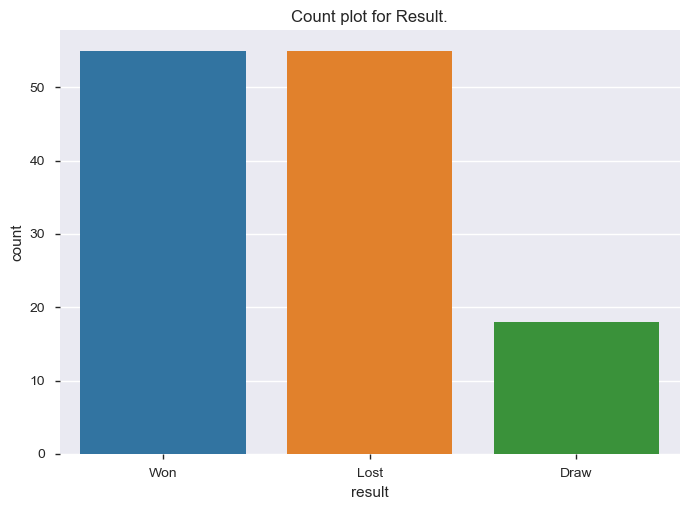

In [12]:
sns.countplot(x='result', data=fifa_data).set_title('Count plot for Result.')

In [13]:
fifa_data.groupby(['result'])['result'].count()

result
Draw    18
Lost    55
Won     55
Name: result, dtype: int64

You can see that there are 128 matches out of where we have one side result on 110 occurances and 18 occurrances were no result

### 5.2 Of all the matches, check the count of distribution of match result based on man of the match?

Text(0.5, 1.0, 'Count plot for Result.')

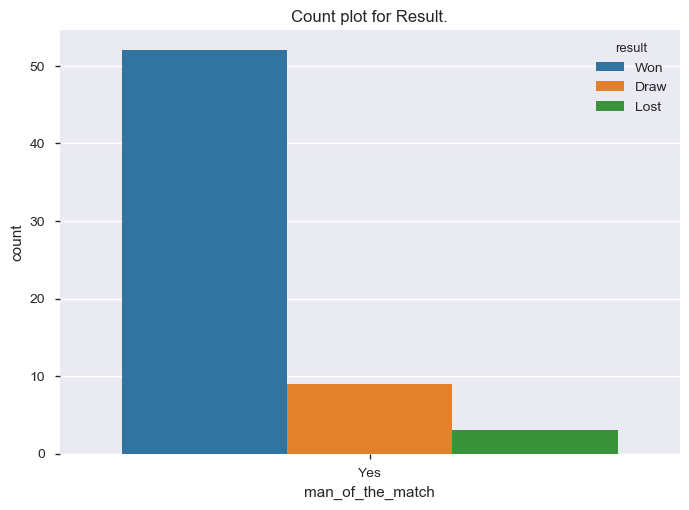

In [14]:
sns.countplot(x='man_of_the_match', hue = 'result', data=fifa_data[fifa_data['man_of_the_match'] == 'Yes']).set_title('Count plot for Result.')

Text(0.5, 1.0, 'man_of_the_match (Draw)')

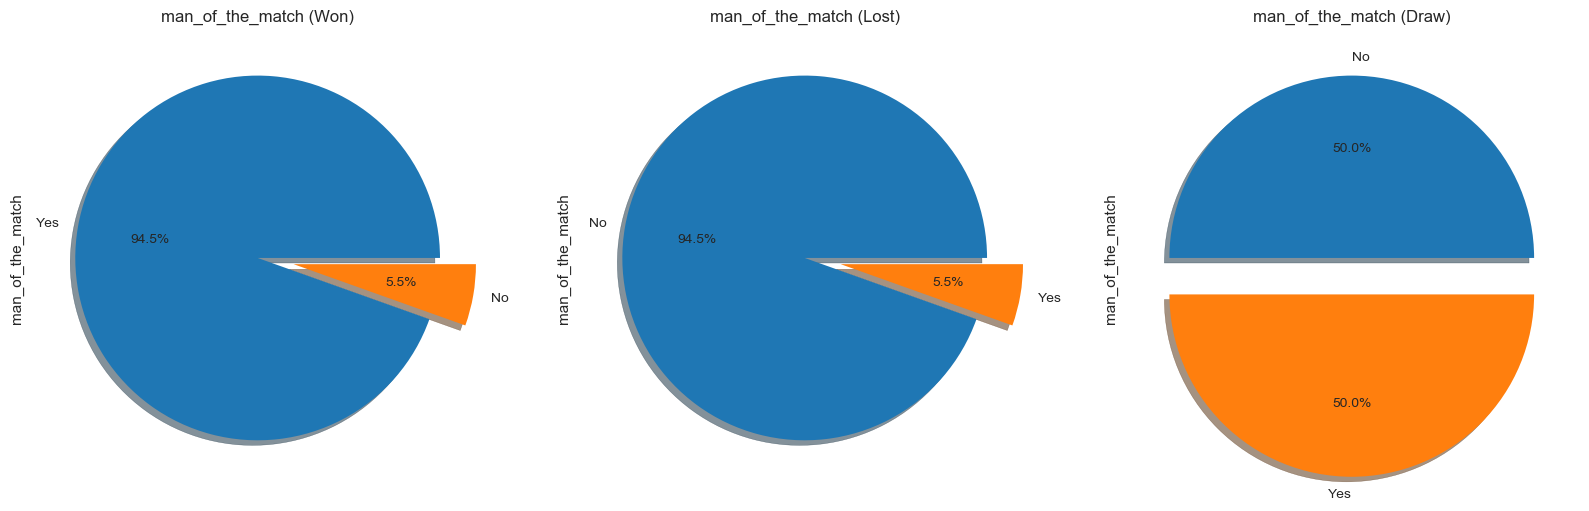

In [15]:
f,ax = plt.subplots(1,3,figsize=(20,7))
fifa_data['man_of_the_match'][fifa_data['result'] == 'Won'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
fifa_data['man_of_the_match'][fifa_data['result'] == 'Lost'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
fifa_data['man_of_the_match'][fifa_data['result'] == 'Draw'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[2],shadow=True)
ax[0].set_title('man_of_the_match (Won)')
ax[1].set_title('man_of_the_match (Lost)')
ax[2].set_title('man_of_the_match (Draw)')

In [16]:
fifa_data[fifa_data['man_of_the_match'] == 'Yes'].groupby(['man_of_the_match', 'result'])['result'].count()

man_of_the_match  result
Yes               Draw       9
                  Lost       3
                  Won       52
Name: result, dtype: int64

Now here you see that even when match is lost there are 3 occurances that man of the match was awarded to loosing team. So, Man of the match does not completely depend on the which team won the game. There are other factors as well which contribute to Man of the Match.

### 5.3 Which are top 5 teams to recieve most Man of the Match Awards ?

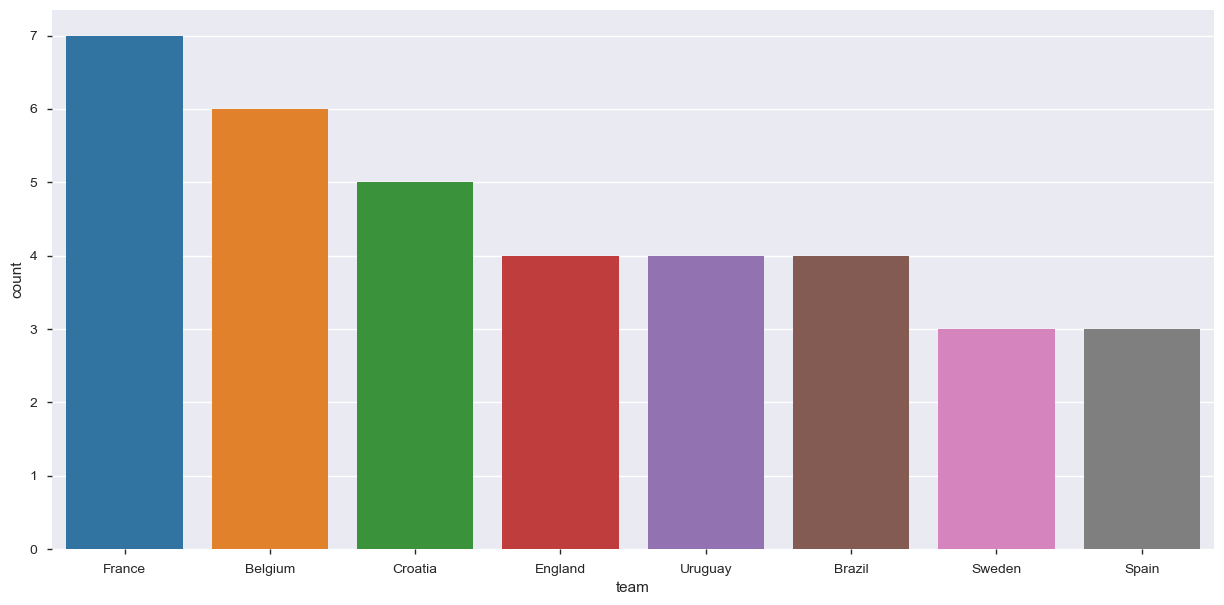

In [17]:
team_mom_count_df = fifa_data.groupby('team')['man_of_the_match'].apply(lambda x: (x=='Yes').sum()).reset_index(name='count').sort_values(['count'], ascending=False).head(8)
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(x='team', y='count', data= team_mom_count_df, ax=ax)

Here we see that France, Belgium, Croatia, England  and Urgyay are top 5 teams winning Man of the Match Award

### 5.4 Which are top 5 teams to Won the match ?

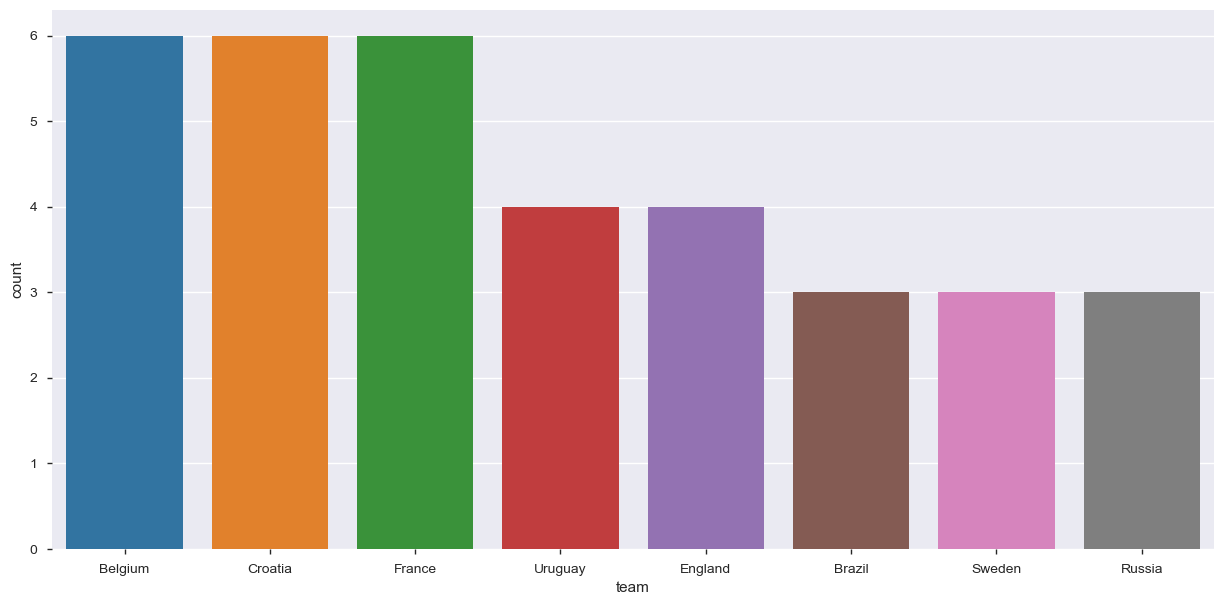

In [18]:
team_result_count_df = fifa_data.groupby('team')['result'].apply(lambda x: (x=='Won').sum()).reset_index(name='count').sort_values(['count'], ascending=False).head(8)
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(x='team', y='count', data= team_result_count_df, ax=ax)

Here we see that Belgium, Croatia, France are top 3 teams winning the match. 

So if we observe closely, top 5 teams to win man of the match awards and won the match are all same Namely Belgium, Croatia, France, Uruguay, England.

Now let us drill down to understand which factors among these were common so that they could remain on the top.

In [19]:
fifa_data_new = fifa_data.copy(deep=True) 

In [20]:
from sklearn.preprocessing import LabelEncoder                                    # Label encoder is used to transform non-numerical labels to numerical labels.
number = LabelEncoder()                                                           # Here as our data set consists only of categorical values except age
for i in fifa_data_new.columns:                                                          # in order to find the correlation between variables, we do Label encoding 
    fifa_data_new[i] = number.fit_transform(fifa_data_new[i].astype('str'))

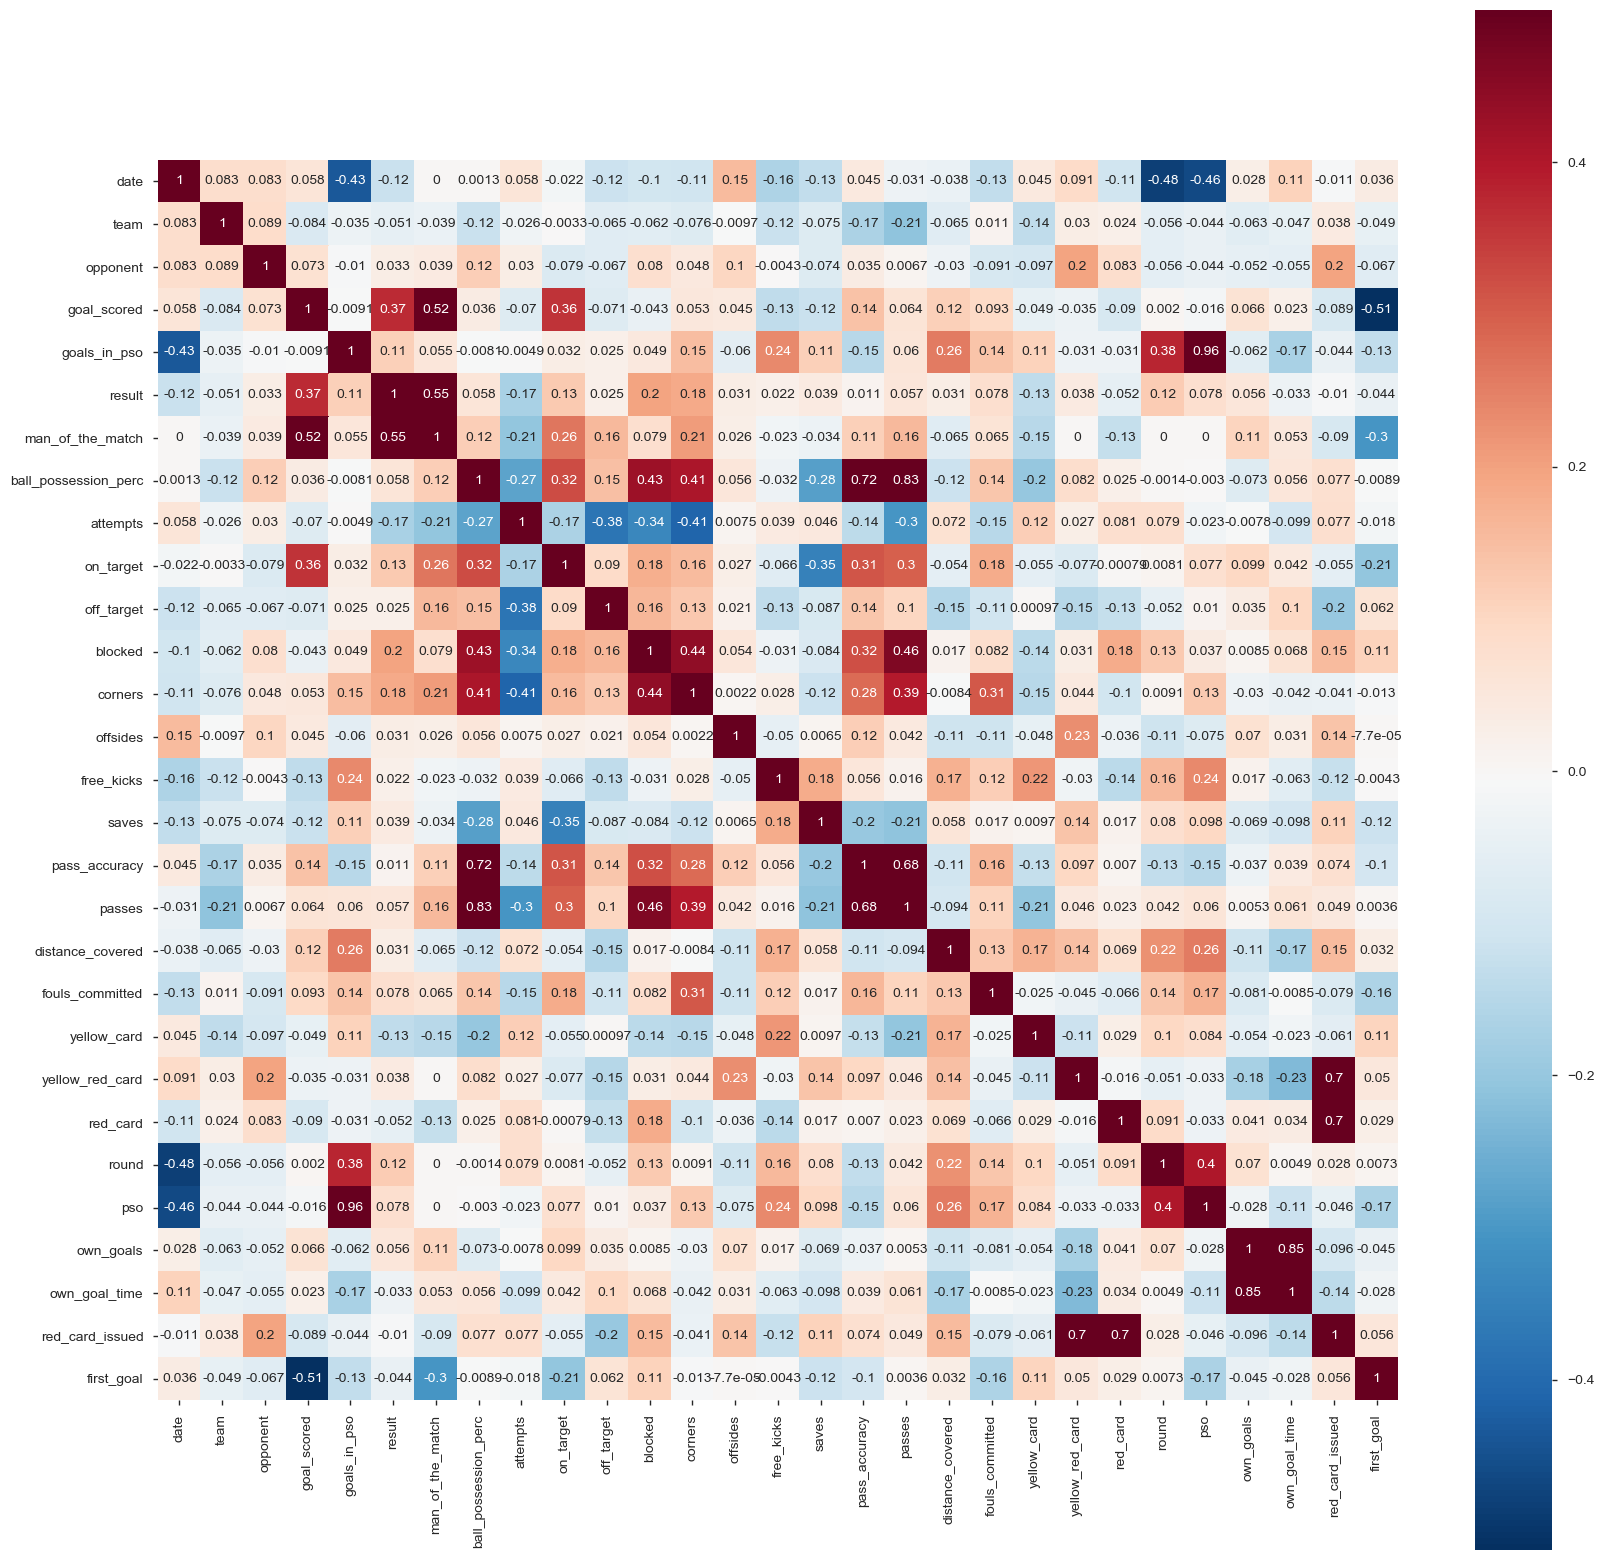

In [21]:
features_correlation = fifa_data_new.corr()
plt.figure(figsize=(20,20))
sns.heatmap(features_correlation,vmax=0.5,square=True,annot=True, cmap='RdBu_r', yticklabels=1)
plt.show()


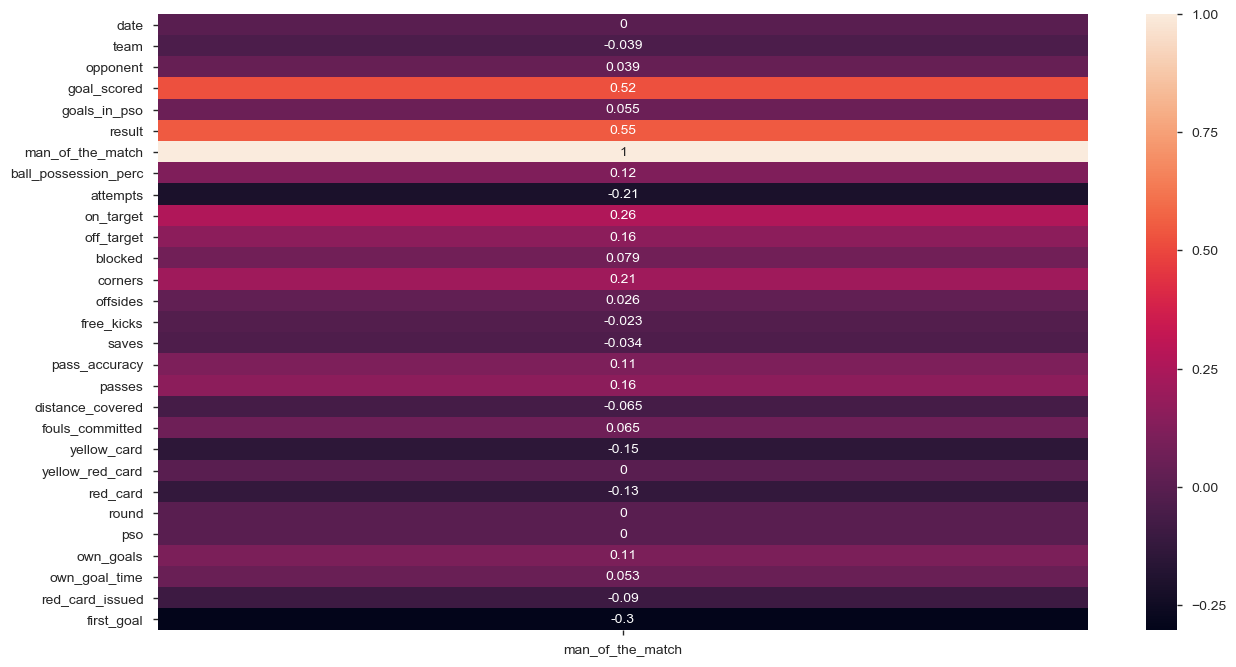

In [22]:
corr = fifa_data_new.corr()
corr = corr.filter(items = ['man_of_the_match'])
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

- 'Man of the Match' is highly positively correlated with 'Goal Scored', 'Result', 'On-Target', 'Corners'
- Own goal time is twins of 'Ball possession %', and Passes, pass Accuracy
- ['blocked', 'offsides', 'saves','distance_covered', 'red_card_issued', 'first_goal', 'goals_in_pso'] These features have least or no relation with 'man_of_the_match'.


C:\Users\Sampada\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Sampada\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


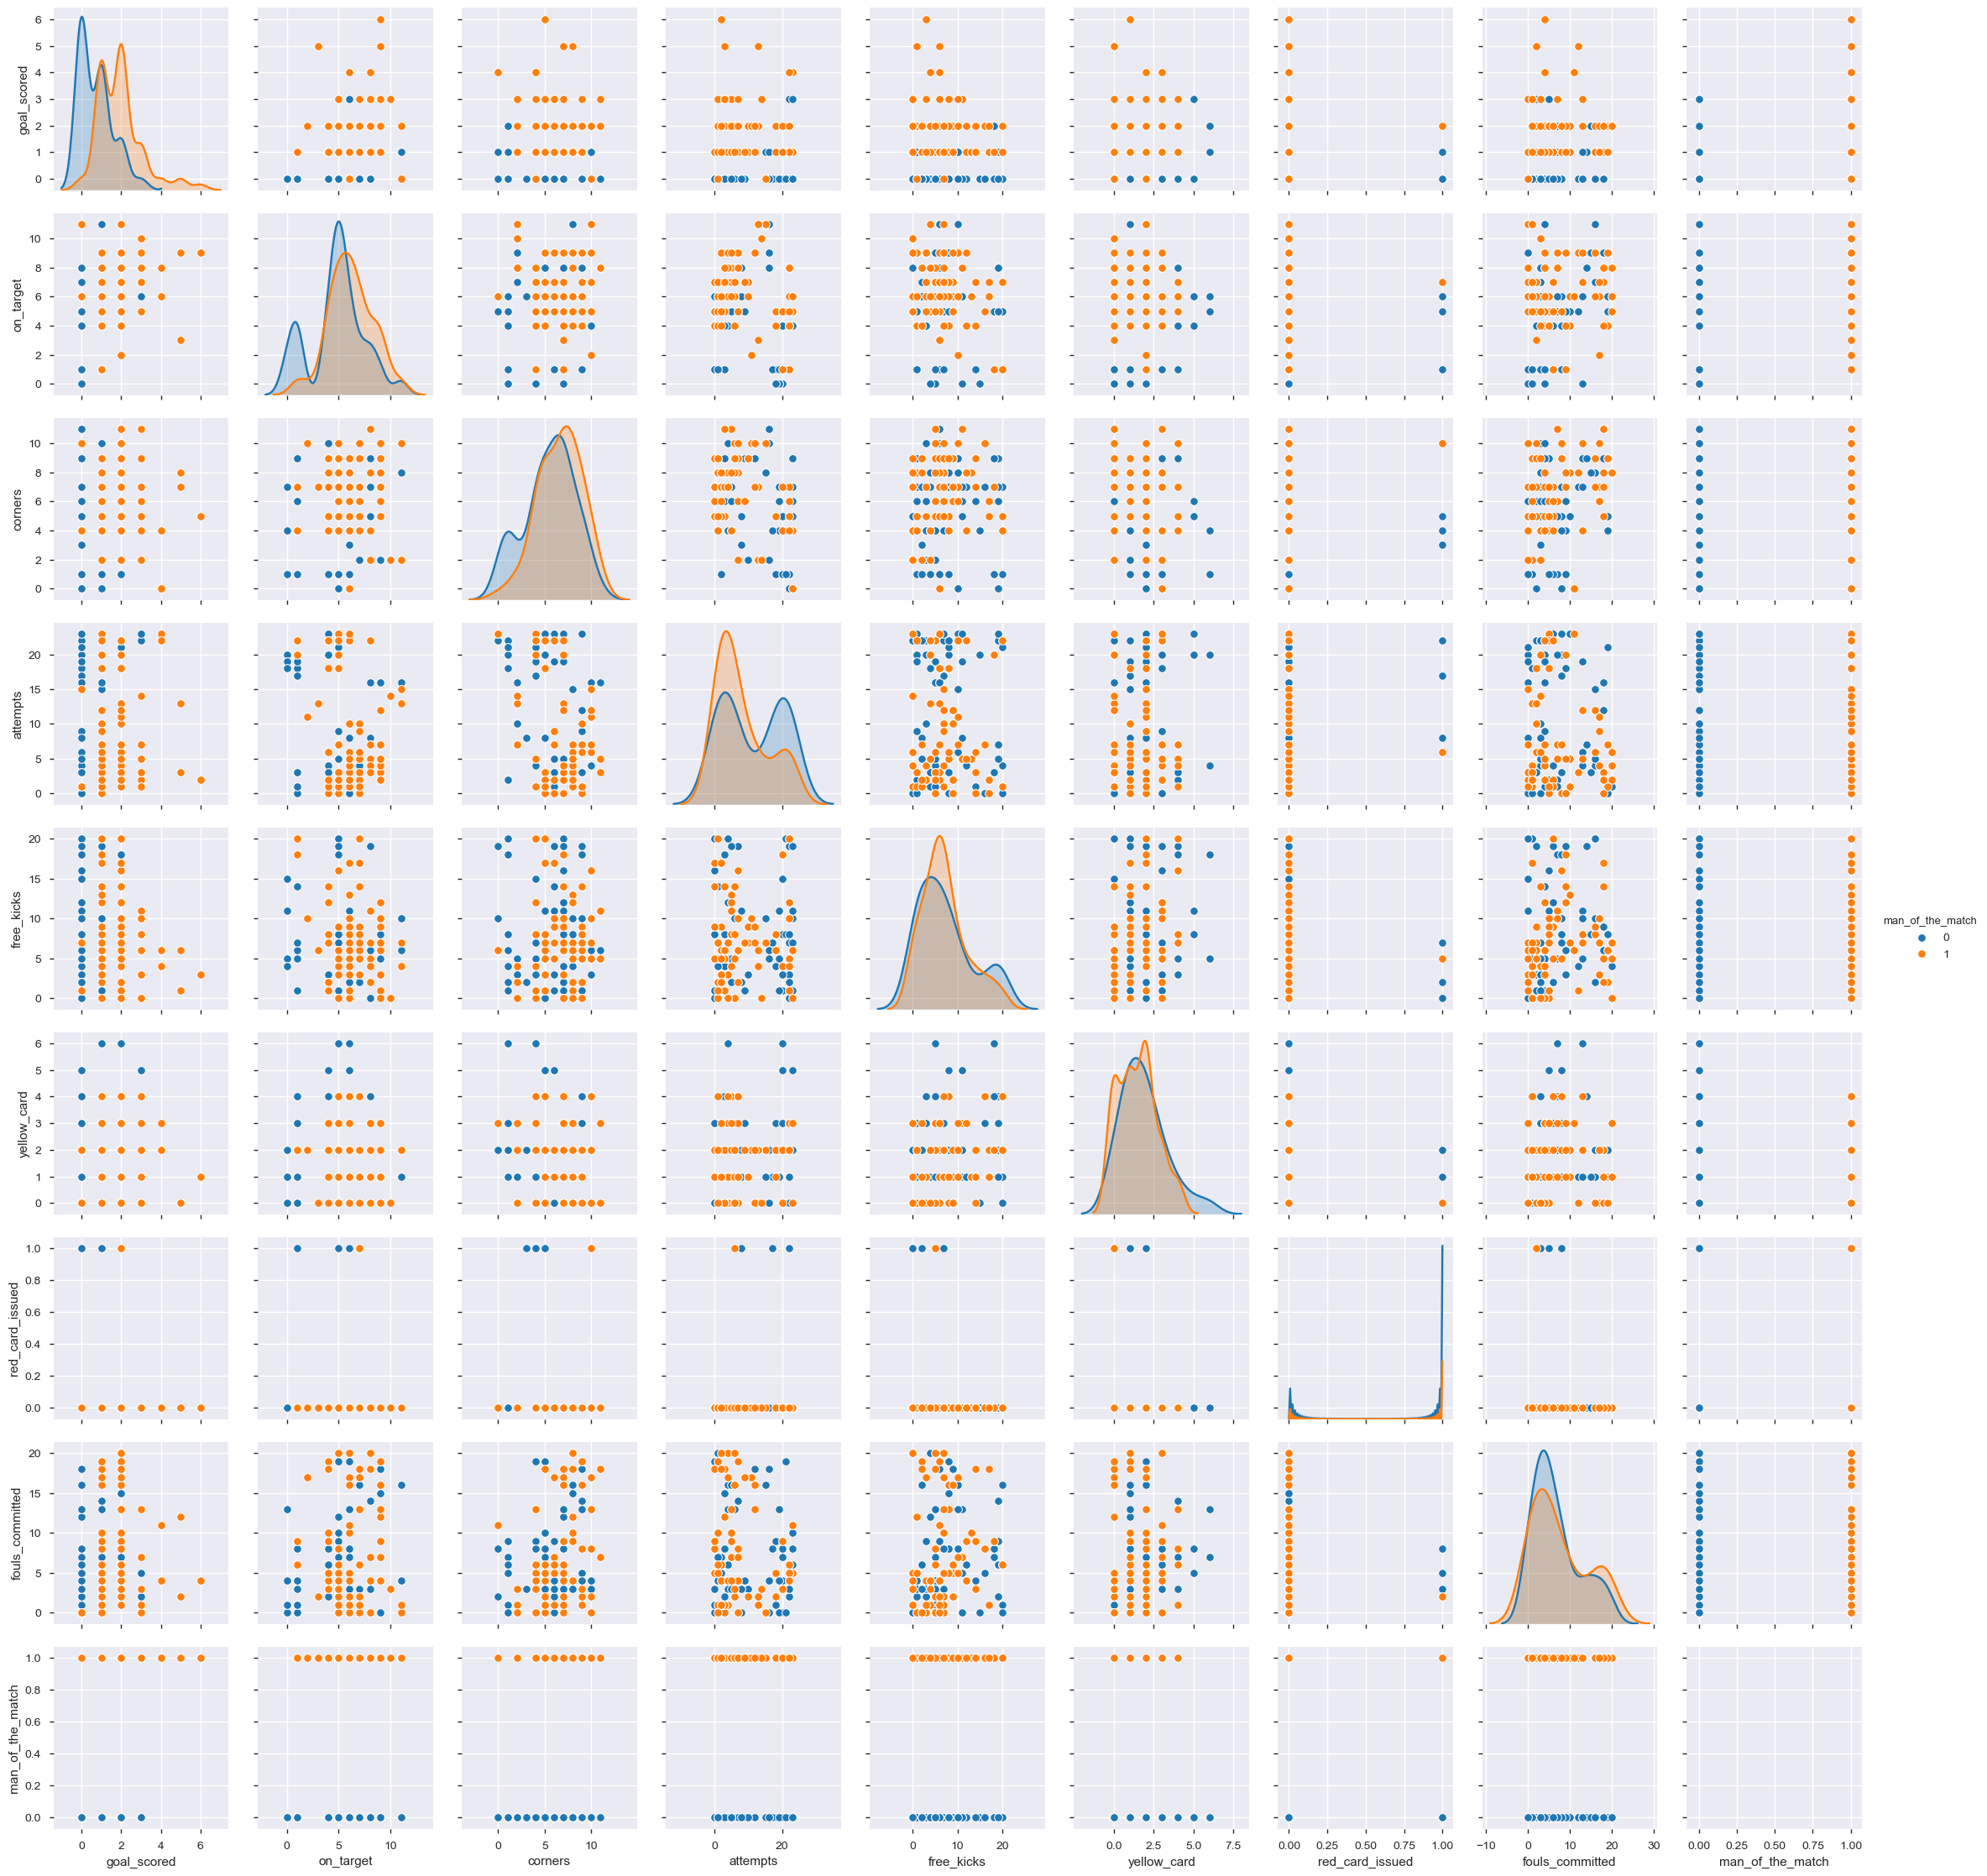

In [23]:
var1 = ['goal_scored', 'on_target', 'corners', 'attempts', 'free_kicks', 'yellow_card', 'red_card_issued', 'fouls_committed']
var1.append('man_of_the_match')

sns.pairplot(fifa_data_new[var1], hue='man_of_the_match')
plt.show()

As I can notice 'Attempts' is linearly proportional to 'On-Target' and 'Corners'
'Corners' and 'On-Targets' are also linearly positively proportional
- Dealing with missing values<br/>
    - __Own_Goal_Time__  -> Droping column as there are 90.6% values missing
    - __Own_Goals__ -> Droping column as it is reated to __own goal times__ and also 90.6% values are missing
    - __First_Goal__ -> Droping Column as even replacing the values with _Mean_ will not make sense for all rows. We could do conditional replace like the value could be filled for rows only when total number of goals are greater than 0. But again the unit is time which I think is not much dependent for the current use case where we want to predict __Man of Match Award__
    

In [24]:
fifa_data.drop(['own_goal_time', 'own_goals', 'first_goal'], axis = 1,inplace = True)

In [25]:
fifa_data.drop(['yellow_red_card', 'red_card', 'date', 'team', 'opponent', 'round'], axis = 1,inplace = True)
#fifa_data.drop(['yellow_red_card', 'red_card', 'date'], axis = 1,inplace = True)

__Dummification__ of column __round__

In [26]:
fifa_data = pd.get_dummies(fifa_data, columns=['result'], drop_first=True).rename(lambda x: x.replace(" ", "_").lower(), axis='columns')

#fifa_data = pd.get_dummies(fifa_data, columns=['round', 'team', 'opponent', 'result'], drop_first=True).rename(lambda x: x.replace(" ", "_").lower(), axis='columns')


Convert __man_of_the_match__ and __pso__ column values to 1 and 0

In [27]:
fifa_data['man_of_the_match'] = fifa_data['man_of_the_match'].replace({'No': 0, 'Yes': 1})
fifa_data['pso'] = fifa_data['pso'].replace({'No': 0, 'Yes': 1})

In [28]:
fifa_data.head()

,goal_scored,goals_in_pso,man_of_the_match,ball_possession_perc,attempts,on_target,off_target,blocked,corners,offsides,free_kicks,saves,pass_accuracy,passes,distance_covered,fouls_committed,yellow_card,pso,red_card_issued,result_lost,result_won
0,5,0,1,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0,0,1
1,0,0,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0,1,0
2,0,0,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0,1,0
3,1,0,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0,0,1
4,0,0,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0,1,0


## 5. Preparing X and y using pandas

In [29]:
X = fifa_data.loc[:,fifa_data.columns != 'man_of_the_match']
X.head()


,goal_scored,goals_in_pso,ball_possession_perc,attempts,on_target,off_target,blocked,corners,offsides,free_kicks,saves,pass_accuracy,passes,distance_covered,fouls_committed,yellow_card,pso,red_card_issued,result_lost,result_won
0,5,0,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0,0,1
1,0,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0,1,0
2,0,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0,1,0
3,1,0,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0,0,1
4,0,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0,1,0


In [30]:
y = fifa_data.man_of_the_match 

## 5.1 Splitting X and y into training and test datasets.

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [32]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(102, 20)
(102,)
(26, 20)


__Logistic Regression__

In [33]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

y_pred_train = logreg.predict(X_train)  
y_pred_test = logreg.predict(X_test)  

print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

#confusion_matrix = confusion_matrix(y_test, y_pred_test)
resultsLR = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
resultsLR.index = ['MOM Not Received','MOM Received']
resultsLR.columns = ['Predicted MOM Not Received','Predicted MOM Received']
print(resultsLR)

Accuracy score for test data is: 0.9230769230769231
                  Predicted MOM Not Received  Predicted MOM Received
MOM Not Received                          12                       1
MOM Received                               1                      12


C:\Users\Sampada\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


__Decision Tree__

In [34]:

model = DecisionTreeClassifier(random_state = 0)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)  
y_pred_test = model.predict(X_test)  

print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

resultDT = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
resultDT.index = ['MOM Not Received','MOM Received']
resultDT.columns = ['Predicted MOM Not Received','Predicted MOM Received']
print(resultDT)

Accuracy score for test data is: 0.8461538461538461
                  Predicted MOM Not Received  Predicted MOM Received
MOM Not Received                          10                       3
MOM Received                               1                      12


__Decision Treee with Grid Search__

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier(random_state = 0)


tree_para = [{'criterion':['gini','entropy'],'max_depth': range(2,60),
                             'max_features': ['sqrt', 'log2', None] }]
                            
                            

grid_search = GridSearchCV(decision_tree_classifier,tree_para, cv=10, refit='AUC')
grid_search.fit(X_train, y_train)

y_pred_test2 = grid_search.predict(X_test)
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test2))

resultDTG = pd.DataFrame(confusion_matrix(y_test, y_pred_test2))
resultDTG.index = ['MOM Not Received','MOM Received']
resultDTG.columns = ['Predicted MOM Not Received','Predicted MOM Received']

print(resultDTG)

Accuracy score for test data is: 0.8461538461538461
                  Predicted MOM Not Received  Predicted MOM Received
MOM Not Received                          10                       3
MOM Received                               1                      12


C:\Users\Sampada\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


__RandomForest Classifier__



In [36]:
model = RandomForestClassifier(random_state = 0)
model.fit(X_train, y_train)

model1 = RandomForestClassifier(random_state = 0,
                                n_estimators = 15, min_samples_split = 4,
                                min_samples_leaf = 3)
model1.fit(X_train, y_train)
1
y_pred_train = pd.DataFrame()
y_pred_train = model.predict(X_train)

y_pred_train1 = pd.DataFrame()
y_pred_train1 = model1.predict(X_train)

y_pred_test = model.predict(X_test)                                                           # make predictions on the testing set
y_pred_test1 = model1.predict(X_test)

print('Accuracy score for test data using the model without parameter specification:', accuracy_score(y_test,y_pred_test))
print('Accuracy score for test data using the model with parameter specification:', accuracy_score(y_test,y_pred_test1))


resultRFM = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
resultRFM.index = ['MOM Not Received','MOM Received']
resultRFM.columns = ['Predicted MOM Not Received','Predicted MOM Received']

print(resultRFM)

resultRFM1 = pd.DataFrame(confusion_matrix(y_test, y_pred_test1))
resultRFM1.index = ['MOM Not Received','MOM Received']
resultRFM1.columns = ['Predicted MOM Not Received','Predicted MOM Received']
print(resultRFM1)

Accuracy score for test data using the model without parameter specification: 0.9615384615384616
Accuracy score for test data using the model with parameter specification: 0.9615384615384616
                  Predicted MOM Not Received  Predicted MOM Received
MOM Not Received                          13                       0
MOM Received                               1                      12
                  Predicted MOM Not Received  Predicted MOM Received
MOM Not Received                          13                       0
MOM Received                               1                      12


C:\Users\Sampada\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [41]:
from sklearn.metrics import precision_score
precision1 = precision_score(y_test,y_pred_test)
print('Precision score for test data using model1 is:', precision1)
precision2 = precision_score(y_test,y_pred_test1)
print('Precision score for test data using model2 is:', precision2)

Precision score for test data using model1 is: 1.0
Precision score for test data using model2 is: 1.0


In [42]:
from sklearn.metrics import recall_score
print('Recall score for test data using model1 is:',recall_score(y_test,y_pred_test))   
print('Recall score for test data using model2 is:',recall_score(y_test,y_pred_test1))

Recall score for test data using model1 is: 0.9230769230769231
Recall score for test data using model2 is: 0.9230769230769231


In [43]:
from sklearn.metrics import f1_score
print('F1_score for test data using model1 is:',f1_score(y_test, y_pred_test))
print('F1_score for test data using model2 is:',f1_score(y_test, y_pred_test1))

F1_score for test data using model1 is: 0.9600000000000001
F1_score for test data using model2 is: 0.9600000000000001


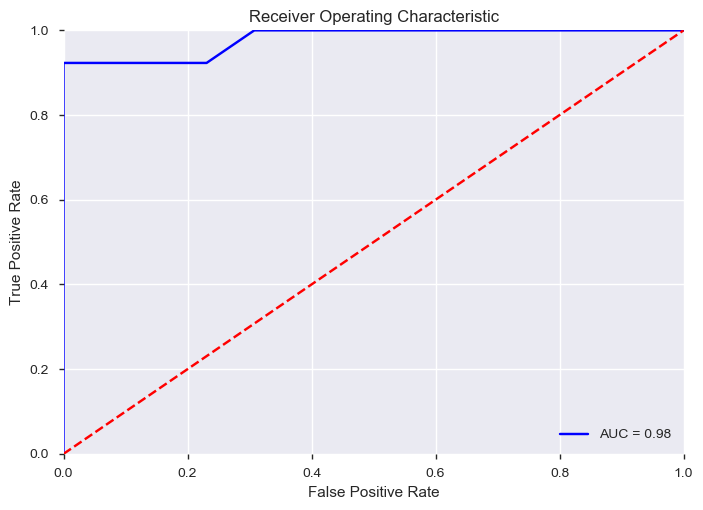

In [44]:
from sklearn import metrics
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

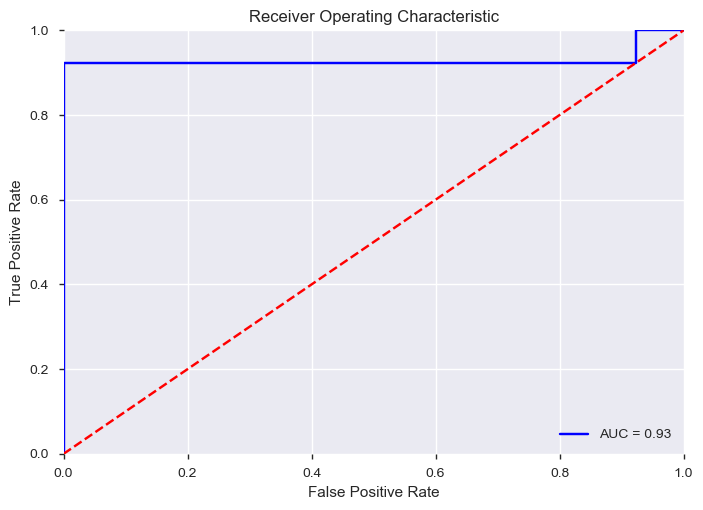

In [45]:
from sklearn import metrics
probs = model1.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Model evaluation techniques to use :
- We shall use Accuracy to evaluate the model as target variable _man_of_the_match_ is balanced and values are distributed in 50% ratio.
- Looking at the Confusion Matrix genetated from Random Forest Model 2 we would like to reduce the False Negative value to 0

- Teams Scoring Max Number of Goals
- Teams with Avg Ball Possession
- Teams with Most On Target
- Teams with most off target
- Blocked ratio of team
- Teams with highest pass_accuracy in avg
- Most fouls by a team
- Most goals done by a team in PSO
- Most own goals done by team
- Fastest first goal avg by a team
- Number of goal attempts done max by team
- Teams doing Fouls 
- Teams with most Yellow , Yellow + red, Red cards
- Most saves by a team
- Teams soring consistently more that 2/3 Goals
- Teams scoring in 1st half ?
- Teams scoring in 2nd half ?
- MOst MOM awarded to team

- Distribution of teams getting man of the match award
- Which team is most likely to get the man of match award on basis on fouls committed, pass accuracy, etc all other metrics
- 
- 